In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import warnings

warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,7827,INN07828,2,0,2,1,Meal Plan 1,0,Room_Type 1,88,2018,12,18,Offline,0,0,0,75.00,0,Not_Canceled
1,28678,INN28679,2,0,2,2,Meal Plan 1,0,Room_Type 2,109,2018,4,16,Online,0,0,0,75.76,0,Not_Canceled
2,12837,INN12838,3,0,0,3,Meal Plan 1,0,Room_Type 4,5,2018,3,24,Online,0,0,0,183.67,2,Not_Canceled
3,17048,INN17049,3,0,2,1,Meal Plan 1,0,Room_Type 1,69,2018,5,14,Online,0,0,0,159.30,1,Not_Canceled
4,22380,INN22381,2,0,2,1,Meal Plan 1,0,Room_Type 4,34,2018,1,17,Offline,0,0,0,48.67,0,Not_Canceled


In [5]:
data.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
data.drop(columns=['Unnamed: 0', 'Booking_ID'],inplace=True)

In [7]:
data.shape

(29020, 18)

In [8]:


data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:

data.drop_duplicates(inplace=True)

In [10]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
data['booking_status'].value_counts()

booking_status
Not_Canceled    15212
Canceled         6140
Name: count, dtype: int64

In [12]:
cat_cols = [ 'type_of_meal_plan', 
'required_car_parking_space', 'room_type_reserved', 'market_segment_type',
'repeated_guest' , 'booking_status' ]


num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 
        'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date',  
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [13]:
len(cat_cols)

6

In [14]:
len(num_cols)

12

In [15]:

# DATA ANALYSIS #

In [16]:
df = data.copy()

In [17]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,Meal Plan 1,0,Room_Type 1,88,2018,12,18,Offline,0,0,0,75.00,0,Not_Canceled
1,2,0,2,2,Meal Plan 1,0,Room_Type 2,109,2018,4,16,Online,0,0,0,75.76,0,Not_Canceled
2,3,0,0,3,Meal Plan 1,0,Room_Type 4,5,2018,3,24,Online,0,0,0,183.67,2,Not_Canceled
3,3,0,2,1,Meal Plan 1,0,Room_Type 1,69,2018,5,14,Online,0,0,0,159.30,1,Not_Canceled
4,2,0,2,1,Meal Plan 1,0,Room_Type 4,34,2018,1,17,Offline,0,0,0,48.67,0,Not_Canceled


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))

    # Handle the case when num_features has only 1 element
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        # Histogram
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, color="blue")    
        axes[i][0].set_title(f"Histogram for {column}")

        # Boxplot
        sns.boxplot(data=df, x=column, ax=axes[i][1], color="skyblue")
        axes[i][1].set_title(f"Boxplot for {column}")

    plt.tight_layout()
    plt.show()


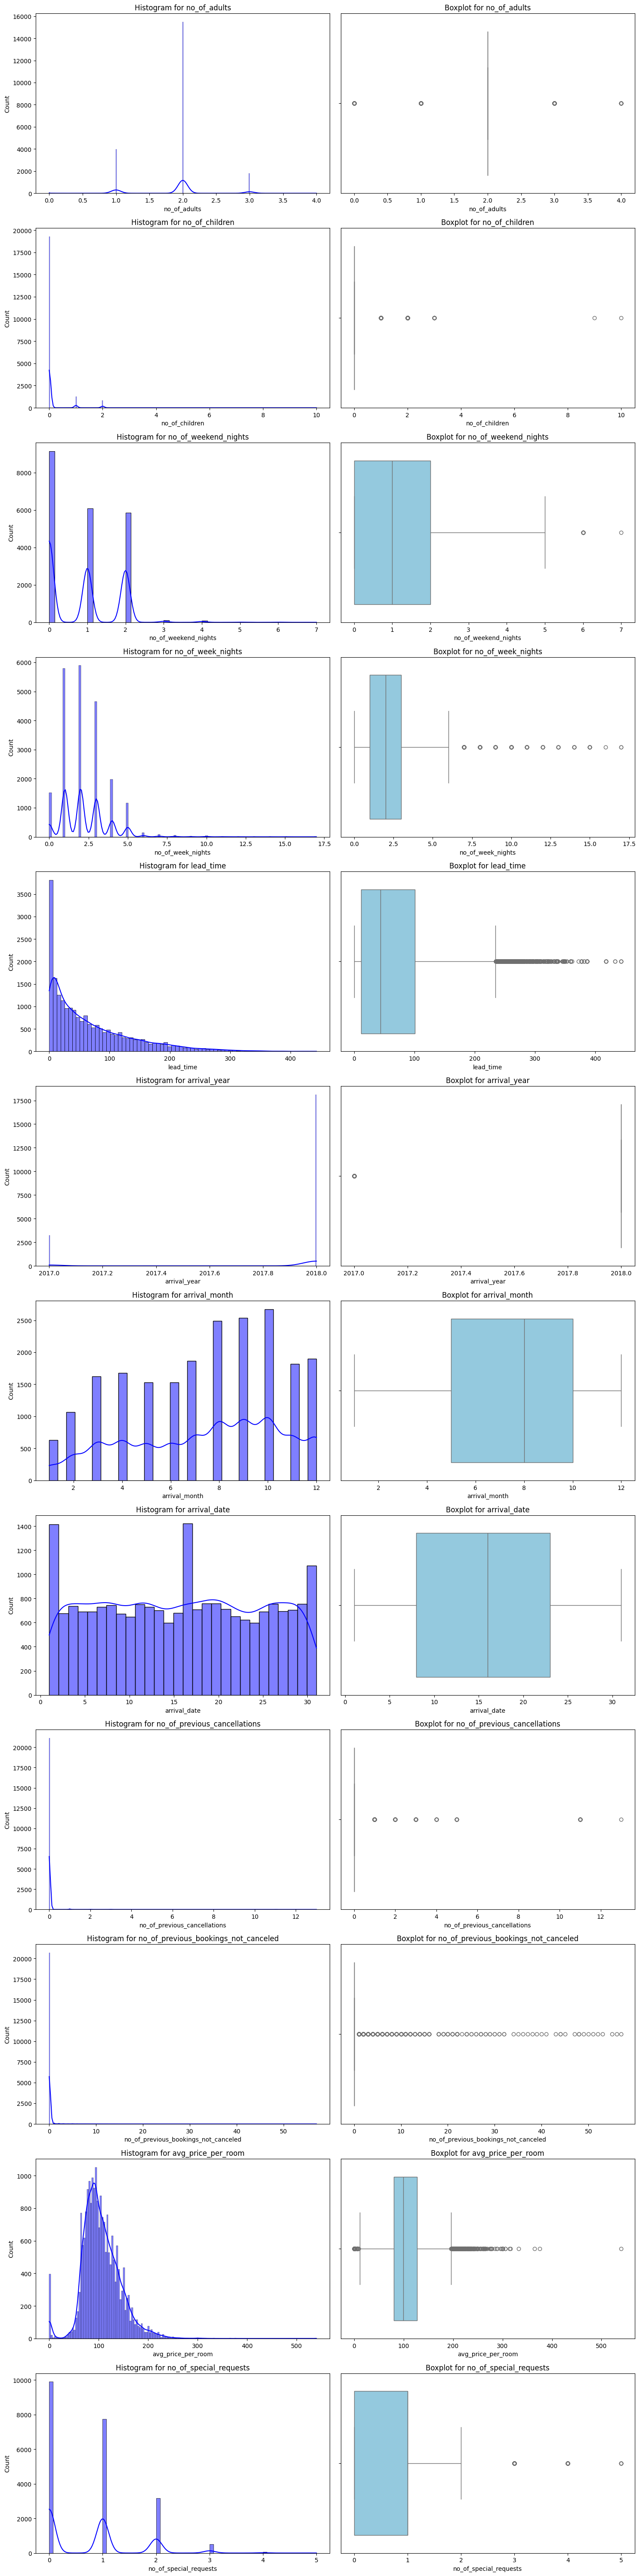

In [19]:
num_plot_dist(df, num_cols)

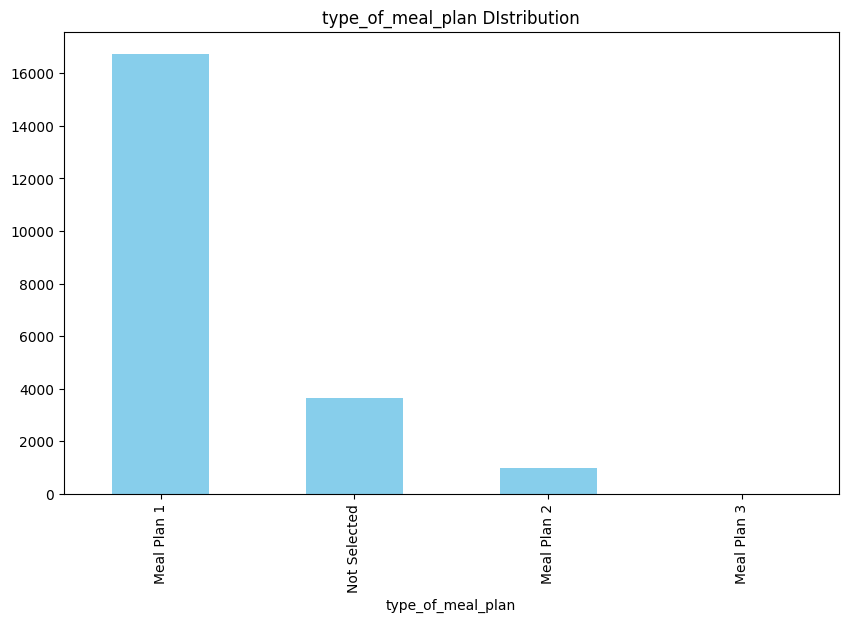

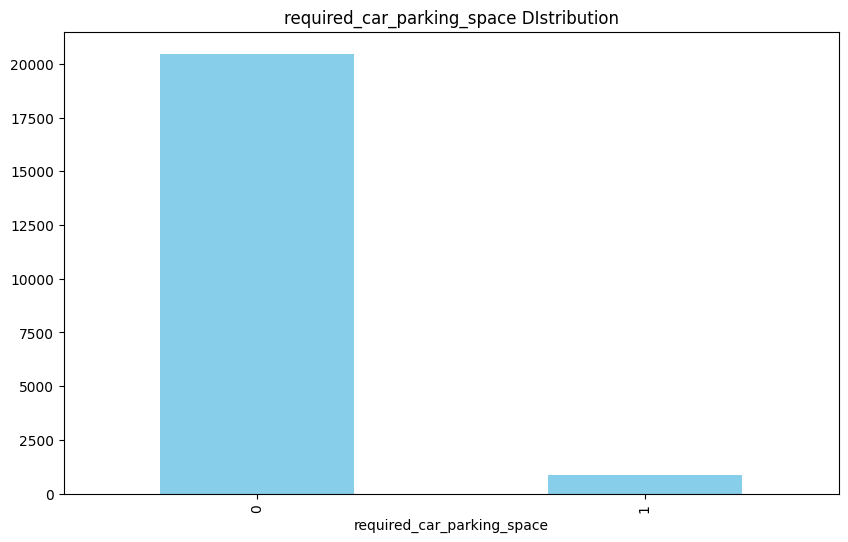

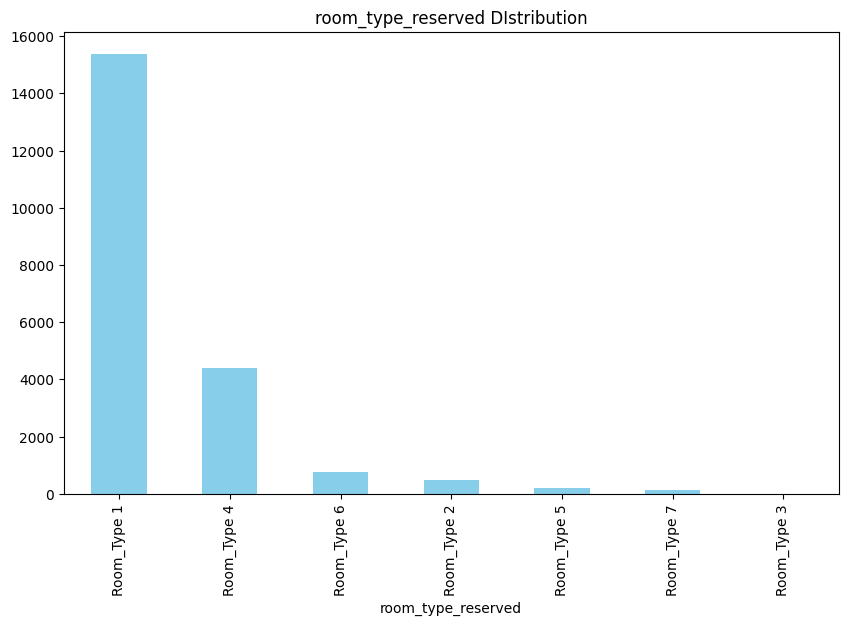

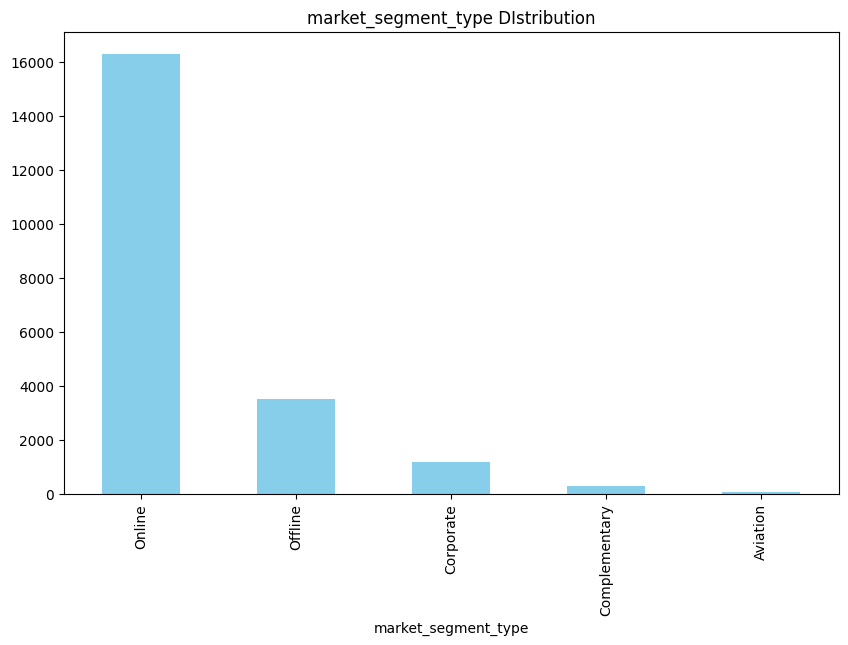

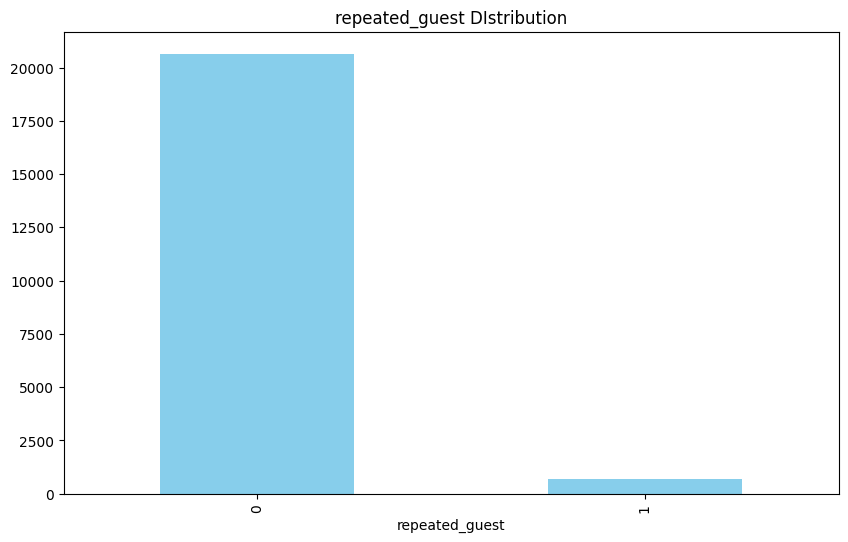

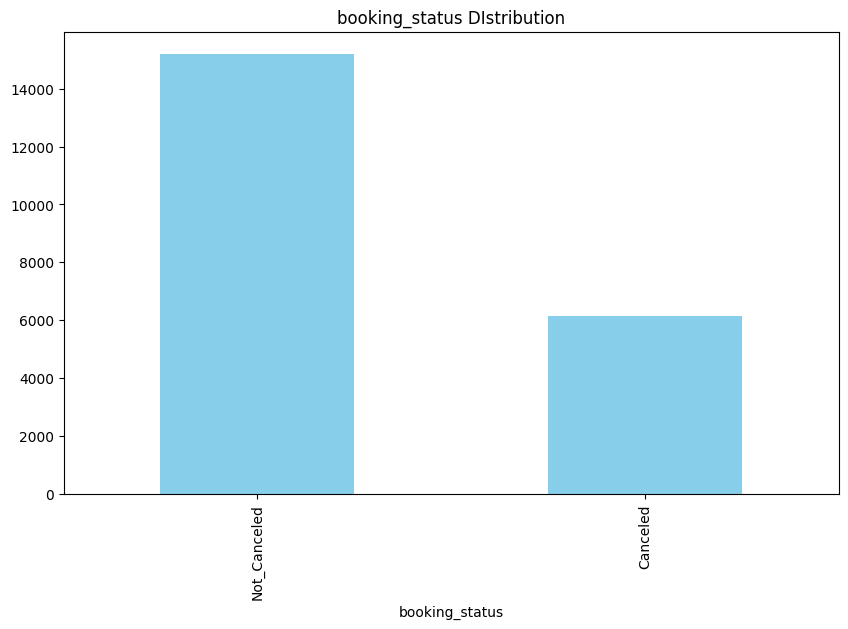

In [20]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_feature} DIstribution")


BIVARITE ANALYSIS


In [21]:
def plot_bivariate_num(df,target, num_features):
    num_plots = len(num_features)
    num_row  = (num_plots+1)//2


    fig, axes = plt.subplots(num_row, 2, figsize=(15, num_row*5))

    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette='Blues')

        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()    

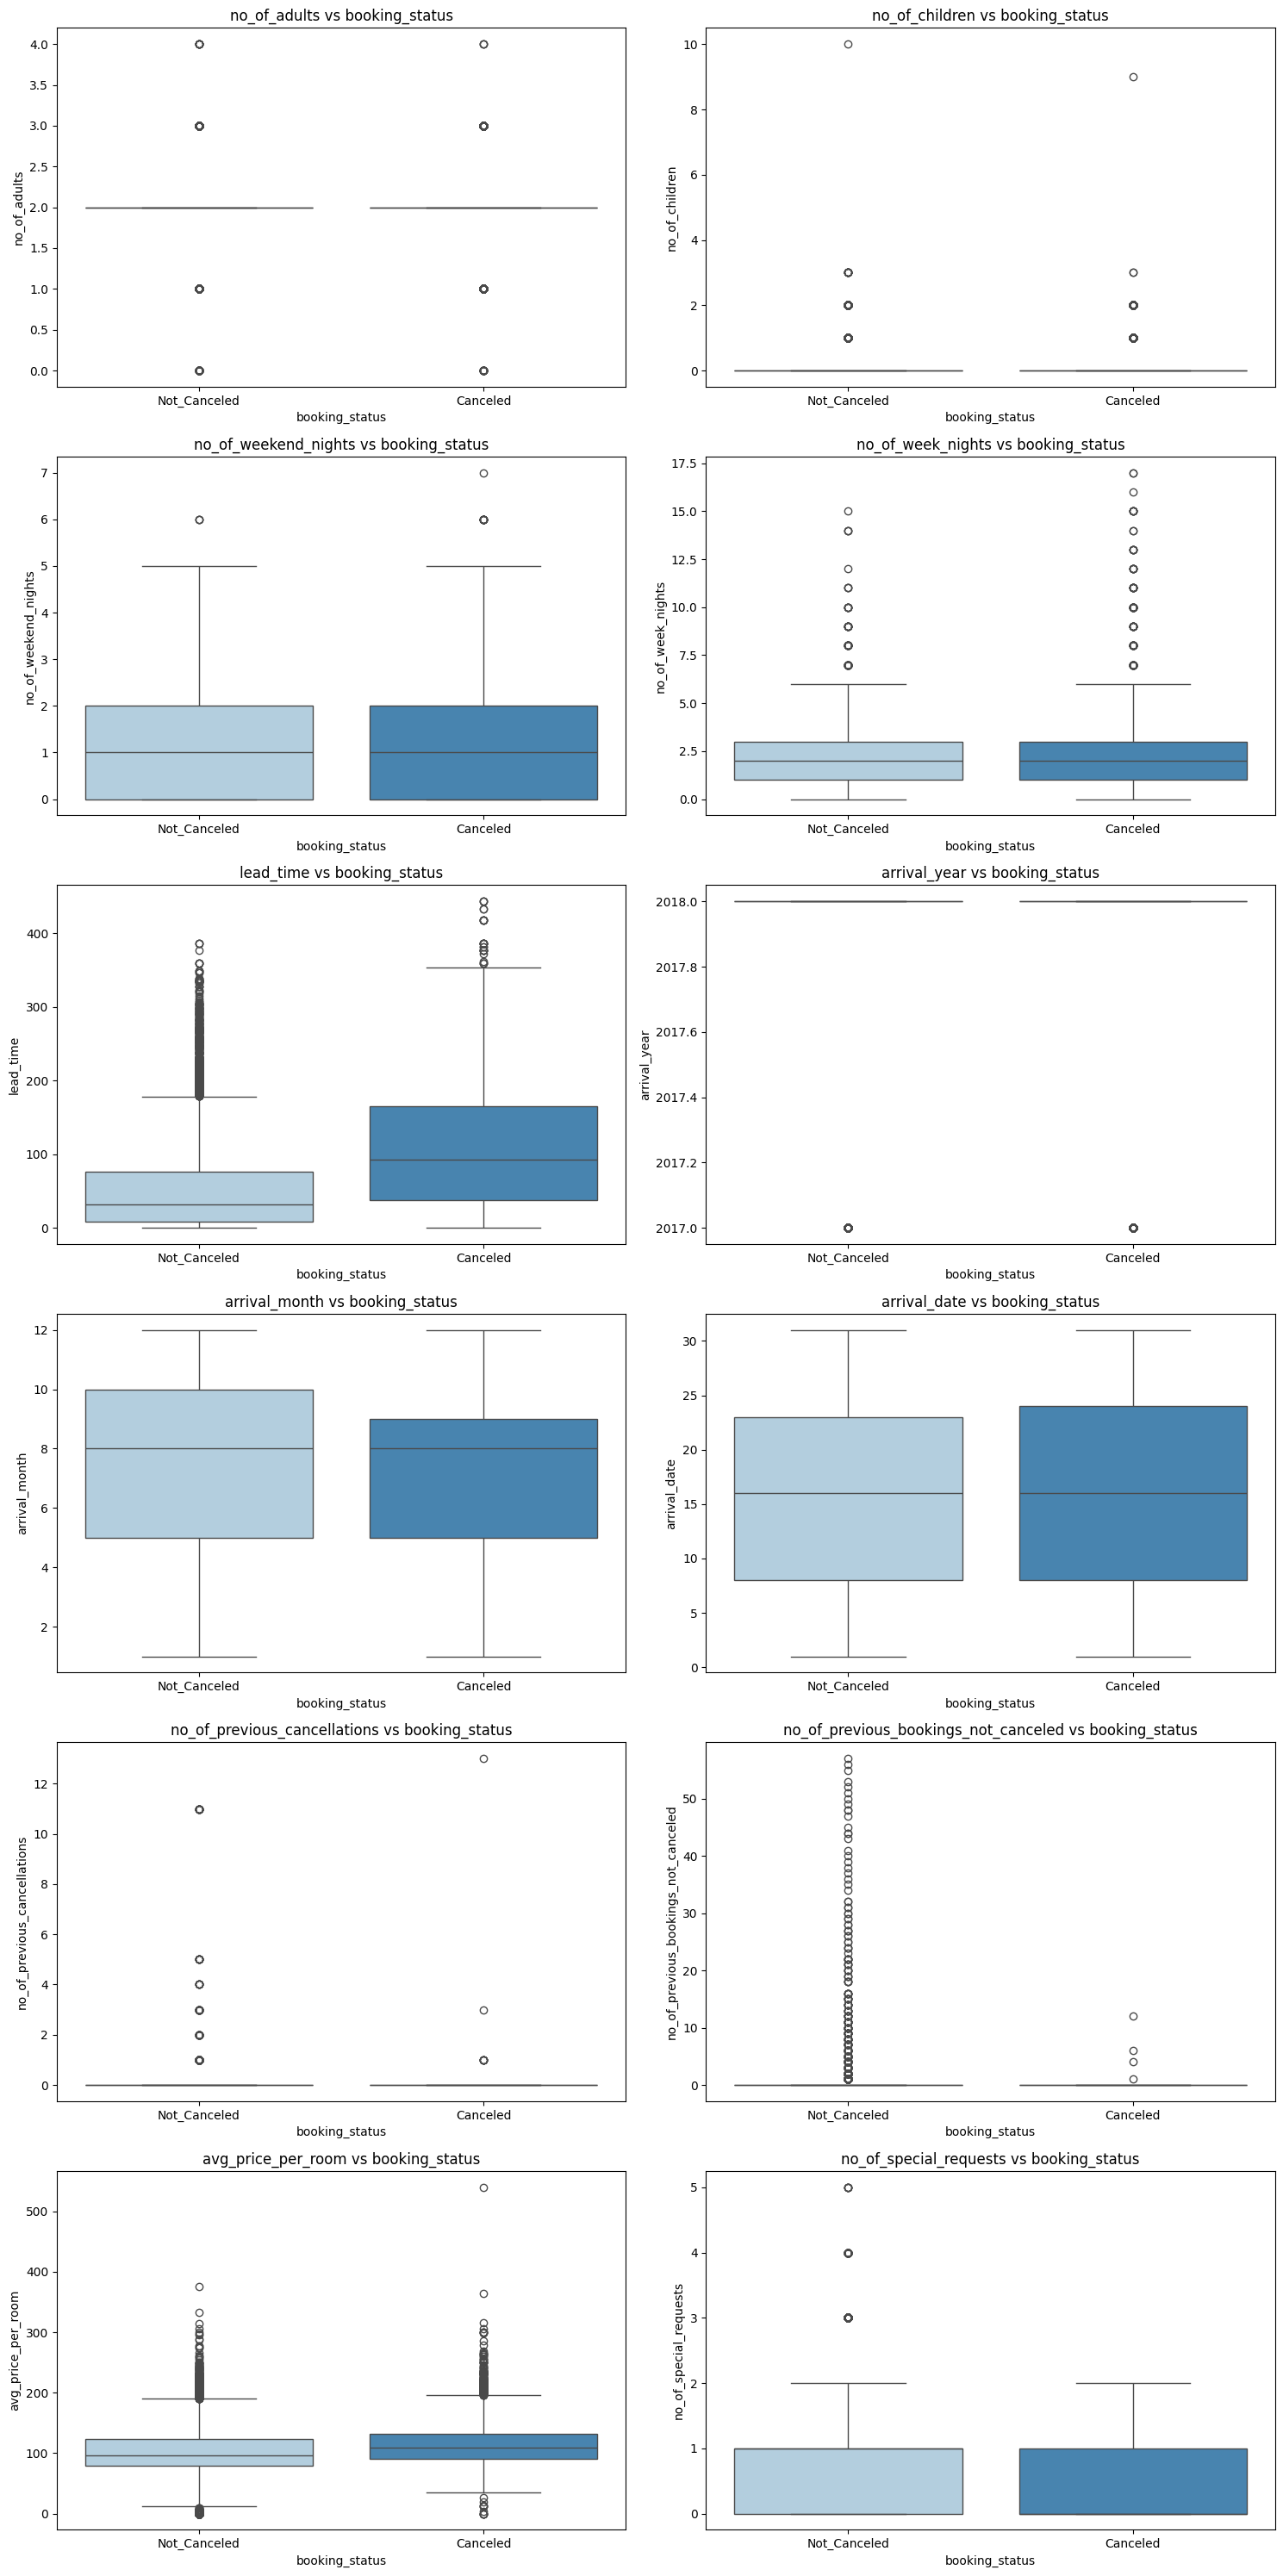

In [22]:
plot_bivariate_num(df, 'booking_status', num_cols)

In [23]:
def plot_bivariate_cat(df,target, cat_features):
    num_features = len(cat_features)
    num_row  = (num_features+1)//2


    fig, axes = plt.subplots(num_row, 2, figsize=(15, num_row*5))

    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue = target,  data=df, palette='Set2', ax = axes[i])

        axes[i].set_title(f"{feature} vs {target}")

        axes[i].tick_params(axis='x', rotation = 90)

    plt.tight_layout()
    plt.show()    

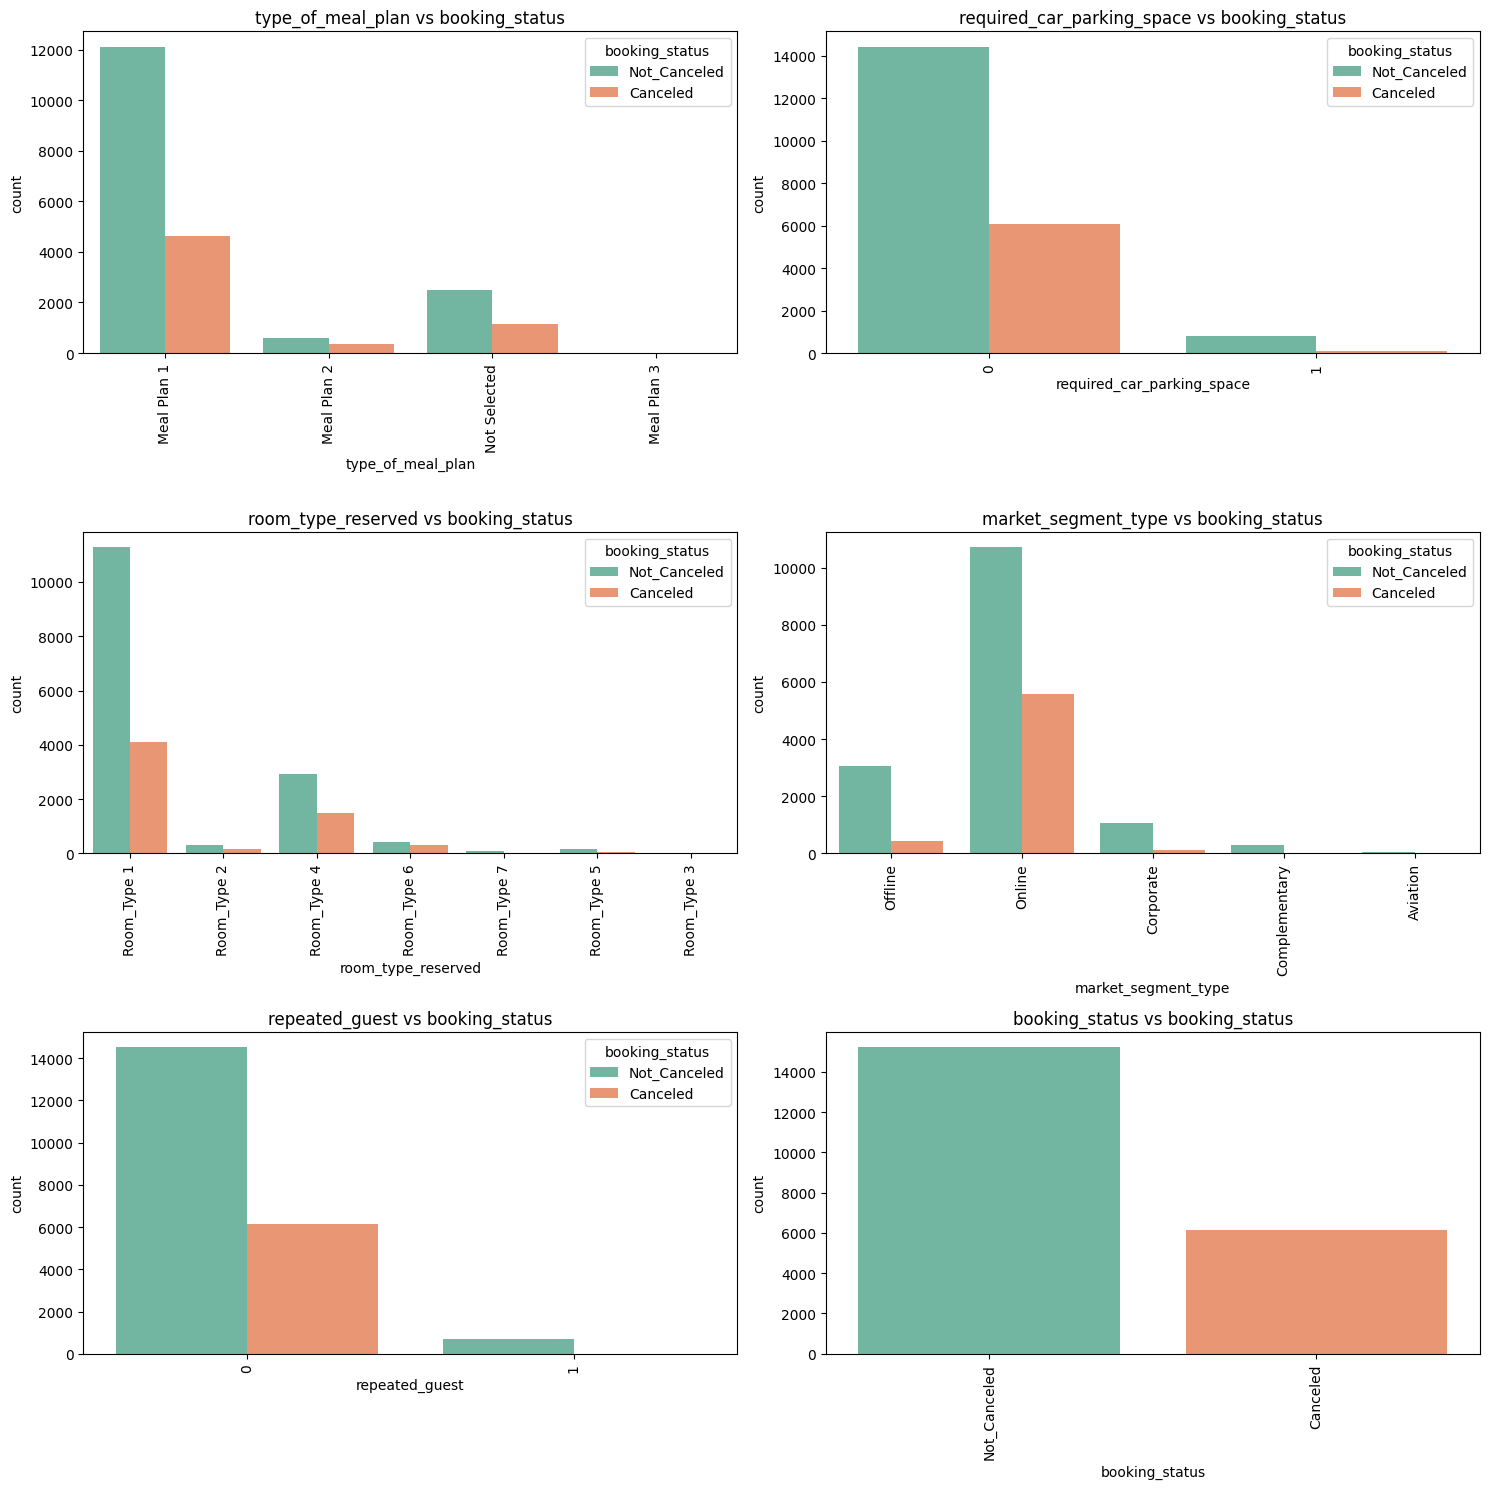

In [24]:
plot_bivariate_cat(df,'booking_status', cat_cols )

DATA PROCESSING

In [25]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,Meal Plan 1,0,Room_Type 1,88,2018,12,18,Offline,0,0,0,75.00,0,Not_Canceled
1,2,0,2,2,Meal Plan 1,0,Room_Type 2,109,2018,4,16,Online,0,0,0,75.76,0,Not_Canceled
2,3,0,0,3,Meal Plan 1,0,Room_Type 4,5,2018,3,24,Online,0,0,0,183.67,2,Not_Canceled
3,3,0,2,1,Meal Plan 1,0,Room_Type 1,69,2018,5,14,Online,0,0,0,159.30,1,Not_Canceled
4,2,0,2,1,Meal Plan 1,0,Room_Type 4,34,2018,1,17,Offline,0,0,0,48.67,0,Not_Canceled


In [26]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21352 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21352 non-null  int64  
 1   no_of_children                        21352 non-null  int64  
 2   no_of_weekend_nights                  21352 non-null  int64  
 3   no_of_week_nights                     21352 non-null  int64  
 4   type_of_meal_plan                     21352 non-null  object 
 5   required_car_parking_space            21352 non-null  int64  
 6   room_type_reserved                    21352 non-null  object 
 7   lead_time                             21352 non-null  int64  
 8   arrival_year                          21352 non-null  int64  
 9   arrival_month                         21352 non-null  int64  
 10  arrival_date                          21352 non-null  int64  
 11  market_segment_type 

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
Label_en = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = Label_en.fit_transform(df[col])

    mappings[col] = {label : code for label,code in zip(Label_en.classes_, Label_en.transform(Label_en.classes_))}

    

In [29]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,0,0,0,88,2018,12,18,3,0,0,0,75.00,0,1
1,2,0,2,2,0,0,1,109,2018,4,16,4,0,0,0,75.76,0,1
2,3,0,0,3,0,0,3,5,2018,3,24,4,0,0,0,183.67,2,1
3,3,0,2,1,0,0,0,69,2018,5,14,4,0,0,0,159.30,1,1
4,2,0,2,1,0,0,3,34,2018,1,17,3,0,0,0,48.67,0,1


In [30]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [32]:
X = add_constant(df)

vif_data = pd.DataFrame()


vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [33]:
vif_data

,feature,VIF
0,const,4.085100e+07
1,no_of_adults,1.336558e+00
2,no_of_children,1.276875e+00
3,no_of_weekend_nights,1.071410e+00
4,no_of_week_nights,1.124328e+00
5,type_of_meal_plan,1.174462e+00
6,required_car_parking_space,1.033397e+00
7,room_type_reserved,1.550529e+00
8,lead_time,1.406827e+00
9,arrival_year,1.289391e+00


In [34]:
corr = df.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.043595,0.095470,0.114738,-0.007379,-0.000949,0.274780,0.152253,0.093043,0.009090,0.021333,0.309379,-0.239840,-0.061592,-0.145207,0.327200,0.157771,-0.094723
no_of_children,-0.043595,1.000000,0.013670,0.018026,-0.104863,0.018675,0.356670,0.008548,0.031214,0.002377,0.026302,0.099527,-0.047756,-0.021188,-0.029176,0.346724,0.096046,-0.064269
no_of_weekend_nights,0.095470,0.013670,1.000000,0.220936,-0.042576,-0.052017,0.031530,0.132606,0.030732,0.010736,0.004357,0.089669,-0.089237,-0.029195,-0.039119,0.004674,0.018954,-0.069290
no_of_week_nights,0.114738,0.018026,0.220936,1.000000,-0.078226,-0.056168,0.085608,0.221165,0.016658,0.028383,-0.001603,0.113683,-0.121589,-0.036952,-0.060641,0.018233,0.031379,-0.125605
type_of_meal_plan,-0.007379,-0.104863,-0.042576,-0.078226,1.000000,-0.019626,-0.246796,-0.046661,0.093475,0.010408,-0.003798,0.181816,-0.074309,-0.011224,-0.045736,-0.104177,-0.013248,-0.036125
required_car_parking_space,-0.000949,0.018675,-0.052017,-0.056168,-0.019626,1.000000,0.013092,-0.041070,0.003864,-0.010838,-0.003300,-0.038358,0.114617,0.027811,0.058326,0.054292,0.068617,0.085806
room_type_reserved,0.274780,0.356670,0.031530,0.085608,-0.246796,0.013092,1.000000,-0.017781,0.086313,-0.001454,0.030055,0.087711,-0.040201,-0.011971,-0.020056,0.487551,0.086364,-0.075821
lead_time,0.152253,0.008548,0.132606,0.221165,-0.046661,-0.041070,-0.017781,1.000000,0.168975,0.136084,0.034499,0.141777,-0.148293,-0.054518,-0.087863,-0.040816,-0.010848,-0.372126
arrival_year,0.093043,0.031214,0.030732,0.016658,0.093475,0.003864,0.086313,0.168975,1.000000,-0.324866,0.013431,0.110117,-0.004157,0.010315,0.026443,0.172549,0.001108,-0.149500
arrival_month,0.009090,0.002377,0.010736,0.028383,0.010408,-0.010838,-0.001454,0.136084,-0.324866,1.000000,-0.018521,-0.012322,-0.006772,-0.049944,-0.010844,0.065335,0.135680,0.013886


<Axes: >

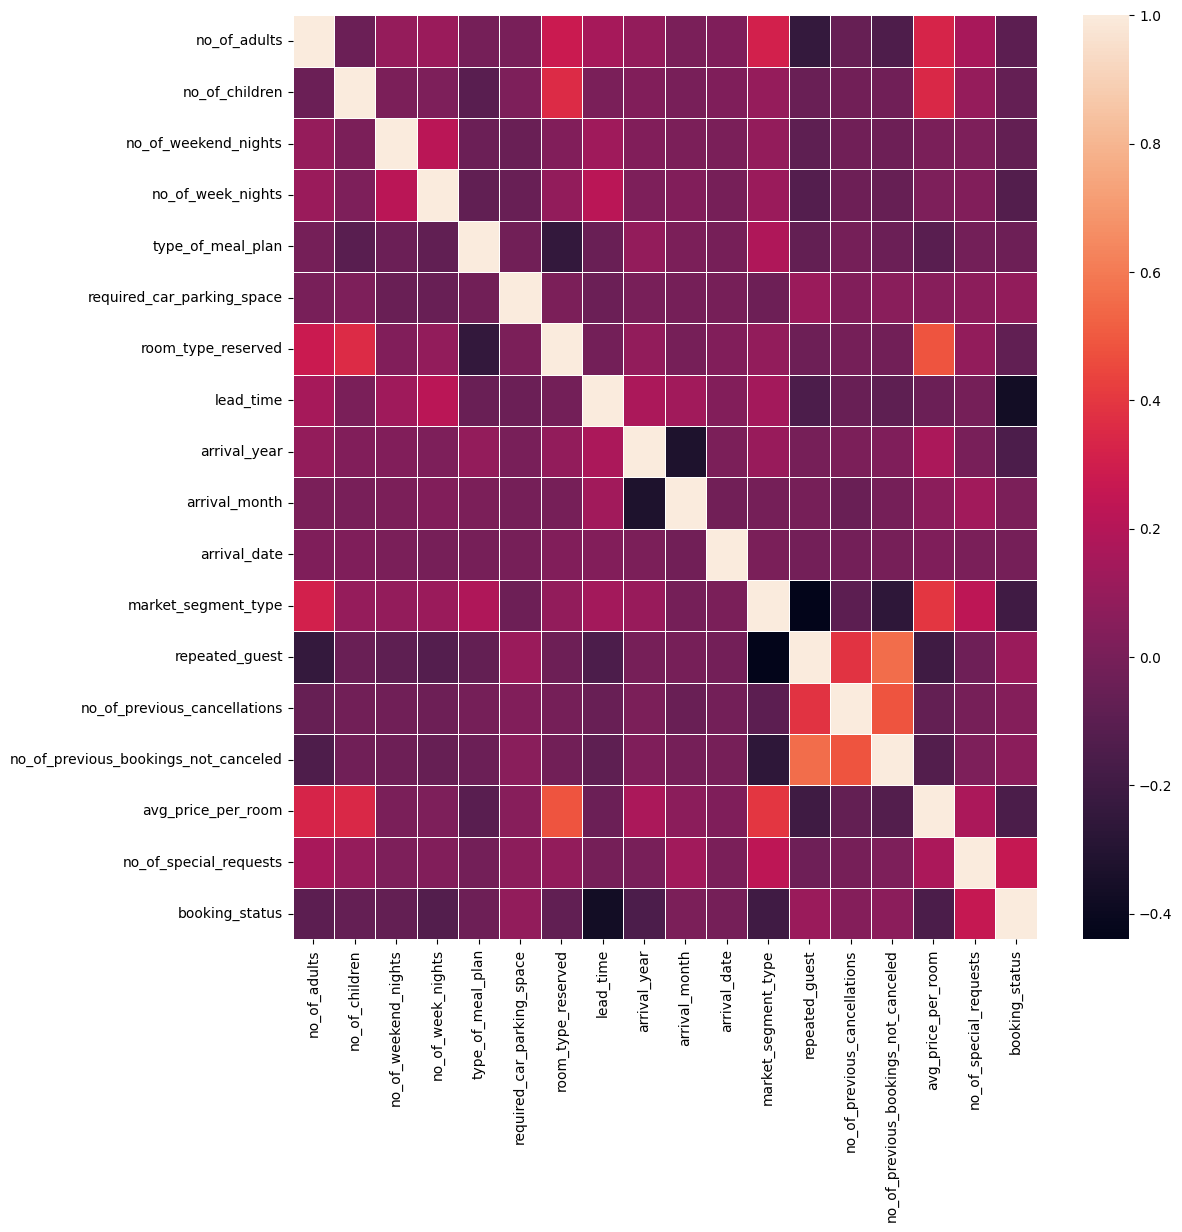

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,  linewidths=0.5)

In [36]:
skewness = df.skew()
skewness

no_of_adults                            -0.287084
no_of_children                           3.982812
no_of_weekend_nights                     0.644290
no_of_week_nights                        1.540043
type_of_meal_plan                        1.646349
required_car_parking_space               4.604347
room_type_reserved                       1.389629
lead_time                                1.410920
arrival_year                            -1.944577
arrival_month                           -0.295662
arrival_date                             0.012120
market_segment_type                     -2.326813
repeated_guest                           5.239638
no_of_previous_cancellations            21.614865
no_of_previous_bookings_not_canceled    16.307615
avg_price_per_room                       0.612429
no_of_special_requests                   0.916369
booking_status                          -0.938764
dtype: float64

In [37]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [38]:
df["booking_status"].value_counts()

booking_status
1    15212
0     6140
Name: count, dtype: int64

In [39]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [40]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [41]:
y

0        1
1        1
2        1
3        1
4        1
        ..
29009    0
29011    1
29013    0
29017    1
29018    1
Name: booking_status, Length: 21352, dtype: int64

In [42]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
y.value_counts()

booking_status
1    15212
0     6140
Name: count, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(random_state=42)

In [46]:
X_res , y_res = smote.fit_resample(X,y)

In [47]:
pd.Series(y_res)

0        1
1        1
2        1
3        1
4        1
        ..
30419    0
30420    0
30421    0
30422    0
30423    0
Name: booking_status, Length: 30424, dtype: int64

In [48]:
y_res.value_counts()

booking_status
1    15212
0    15212
Name: count, dtype: int64

In [49]:
df.shape

(21352, 18)

In [50]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [51]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,0,0,0,88,2018,12,18,3,0.0,0.0,0.0,75.00,0,1
1,2,0,2,2,0,0,1,109,2018,4,16,4,0.0,0.0,0.0,75.76,0,1
2,3,0,0,3,0,0,3,5,2018,3,24,4,0.0,0.0,0.0,183.67,2,1
3,3,0,2,1,0,0,0,69,2018,5,14,4,0.0,0.0,0.0,159.30,1,1
4,2,0,2,1,0,0,3,34,2018,1,17,3,0.0,0.0,0.0,48.67,0,1


In [52]:
df = balanced_df.copy()

In [53]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,0,0,0,88,2018,12,18,3,0.0,0.0,0.0,75.000000,0,1
1,2,0,2,2,0,0,1,109,2018,4,16,4,0.0,0.0,0.0,75.760000,0,1
2,3,0,0,3,0,0,3,5,2018,3,24,4,0.0,0.0,0.0,183.670000,2,1
3,3,0,2,1,0,0,0,69,2018,5,14,4,0.0,0.0,0.0,159.300000,1,1
4,2,0,2,1,0,0,3,34,2018,1,17,3,0.0,0.0,0.0,48.670000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30419,2,0,0,2,0,0,0,274,2018,7,22,4,0.0,0.0,0.0,94.757196,0,0
30420,2,0,2,1,0,0,0,195,2018,6,28,4,0.0,0.0,0.0,105.719571,0,0
30421,2,0,2,1,0,0,0,229,2018,9,14,4,0.0,0.0,0.0,97.681661,0,0
30422,2,0,0,2,3,0,0,101,2018,7,25,4,0.0,0.0,0.0,94.500000,0,0


In [54]:
df.shape

(30424, 18)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [57]:
model = RandomForestClassifier(random_state=42)

model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
feature_importance = model.feature_importances_

In [59]:
feature_importance = pd.DataFrame({
    'feature' : X.columns,
    'importance' : feature_importance
})

In [60]:
top_features = feature_importance.sort_values(by="importance", ascending=False)

In [61]:
top_10_features = top_features['feature'].head(10).values

top_10_features_df = df[top_10_features.tolist()+["booking_status"]]


In [62]:
top_10_features_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,88,0,75.00,12,18,3,1,2,0,0,1
1,109,0,75.76,4,16,4,2,2,0,1,1
2,5,2,183.67,3,24,4,3,0,0,3,1
3,69,1,159.30,5,14,4,1,2,0,0,1
4,34,0,48.67,1,17,3,1,2,0,3,1


In [63]:
len(top_10_features_df.columns)

11

In [64]:
df = top_10_features_df.copy()

In [65]:
!pip install xgboost lightgbm


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score,  recall_score, precision_score, f1_score 

In [67]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [68]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
classifiers = {
    "Random FOrest" : RandomForestClassifier(random_state=42),
    "Logistic Regression " : LogisticRegression(random_state=42),
    "Gradient BOosting" : GradientBoostingClassifier(random_state=42),
    "Support Vector Classifer" : SVC(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "NAive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state = 42),
    "ADaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42)
}

In [70]:
metrics = {
    "Model":[],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" :[],
    "F1 Score" : []
}

In [71]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    

[LightGBM] [Info] Number of positive: 12182, number of negative: 12157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 24339, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500514 -> initscore=0.002054
[LightGBM] [Info] Start training from score 0.002054


In [72]:
metrics_df = pd.DataFrame(metrics)

In [73]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random FOrest,0.879704,0.871604,0.889439,0.880431
1,Logistic Regression,0.765982,0.783746,0.732013,0.756997
2,Gradient BOosting,0.828595,0.809791,0.857096,0.832772
3,Support Vector Classifer,0.721118,0.720915,0.717822,0.719365
4,KNN,0.767625,0.830335,0.670297,0.741782
5,NAive Bayes,0.770583,0.791786,0.731683,0.760549
6,XGboost,0.868529,0.857143,0.883168,0.869961
7,ADaboost,0.794906,0.784847,0.810231,0.797337
8,LGBM,0.858012,0.842288,0.879538,0.860510


In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [75]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [76]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
rf = RandomForestClassifier(random_state=42)

In [78]:
params_dist = {
    'n_estimators' :randint(100,500) ,
    'max_depth' : randint(10,50),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True, False],
}

In [79]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv = 5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [80]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.6s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....00247F0774CB0>, 'min_samples_leaf': <scipy.stats....00247F088A9C0>, 'min_samples_split': <scipy.stats....00247F0774380>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [81]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [82]:
best_rf_model = random_search.best_estimator_

In [83]:
y_pred = best_rf_model.predict(X_test)



In [84]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [85]:
accuracy

0.8770747740345111

In [86]:
precision

0.8643039591315453

In [87]:
recall

0.8933993399339935

In [88]:
f1

0.8786108406361571

In [89]:
import joblib
joblib.dump(best_rf_model, "random_forest.pkl")


['random_forest.pkl']

In [90]:
loaded_model = joblib.load("random_forest.pkl")

In [91]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
19000,126,1,134.18,7,18,4,5,2,1,0


In [92]:
new_data = np.array([126,	1,	134.18, 7,	18,	4,	5,	2,	1	,0]).reshape(1,-1)

In [93]:
predictions = loaded_model.predict(new_data)

In [94]:
print(predictions)

[1]
